In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from Code.Evaluation_functions import archetype_correlation,NMI,Ordinal_reconstuction,ResponsBiasCompereson
import os
import itertools
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
all_types=[0,10,9,20,5,14,2,7,18,11,17,6,15,8,19,4,13,1,16,3,12]

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

def boxplots(x,achetypes,indexes,keys):
    data=pd.DataFrame(Xhat[indexes,:].T,columns=keys[indexes])
    print(data)
    fig, ax = plt.subplots()
    sns.boxplot(x=Xhat[indexes,:],y=indexes)
    fig.show()

def plot_types(X,Z,alpha,beta,keys,indexes):
    fig,ax=plt.subplots(figsize=(30,30),sharex=True)
    ax.boxplot(X[:,indexes],labels=keys[indexes],positions=range(0,len(indexes)))
    ax.plot(Z.T[indexes],marker="o",linestyle="-",label=np.arange(1,Z.shape[0]+1))
    ax.legend()
    plt.hlines(beta[1:-1],-1,len(indexes),colors="black",linestyle='dotted')
    plt.yticks(alpha,["Very much like me","Like me","Some-what like me","A Little like me","Not like me","Not like me at all"],rotation=45,fontsize="17")
    
    plt.show()

# Simulated Data

In [20]:
simsavedir=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\Simulated1"
sigmaTrue=0.4
times=2
with open(os.path.join(simsavedir,f"sigma{sigmaTrue}True"), "r") as file:
        simTrue=json.load(file)

In [24]:

M1simfiles=[f"sigma{sigmaTrue}sample{i}OAA_Result" for i in range(times)]
M1simData=[]
for file in M1simfiles:
    with open(os.path.join(simsavedir,file), "r") as file:
        M1simData.append(json.load(file))
#pd.DataFrame([data["summery"]for data in M1simData[1:]])

In [23]:

M2simfiles=[f"sigma{sigmaTrue}sample{i}RB_Result" for i in range(times)]
M2simData=[]
for file in M2simfiles:
    with open(os.path.join(simsavedir,file), "r") as file:
        M2simData.append(json.load(file))
#pd.DataFrame([data["summery"]for data in M2simData[1:]])

NameError: name 'M1simData' is not defined

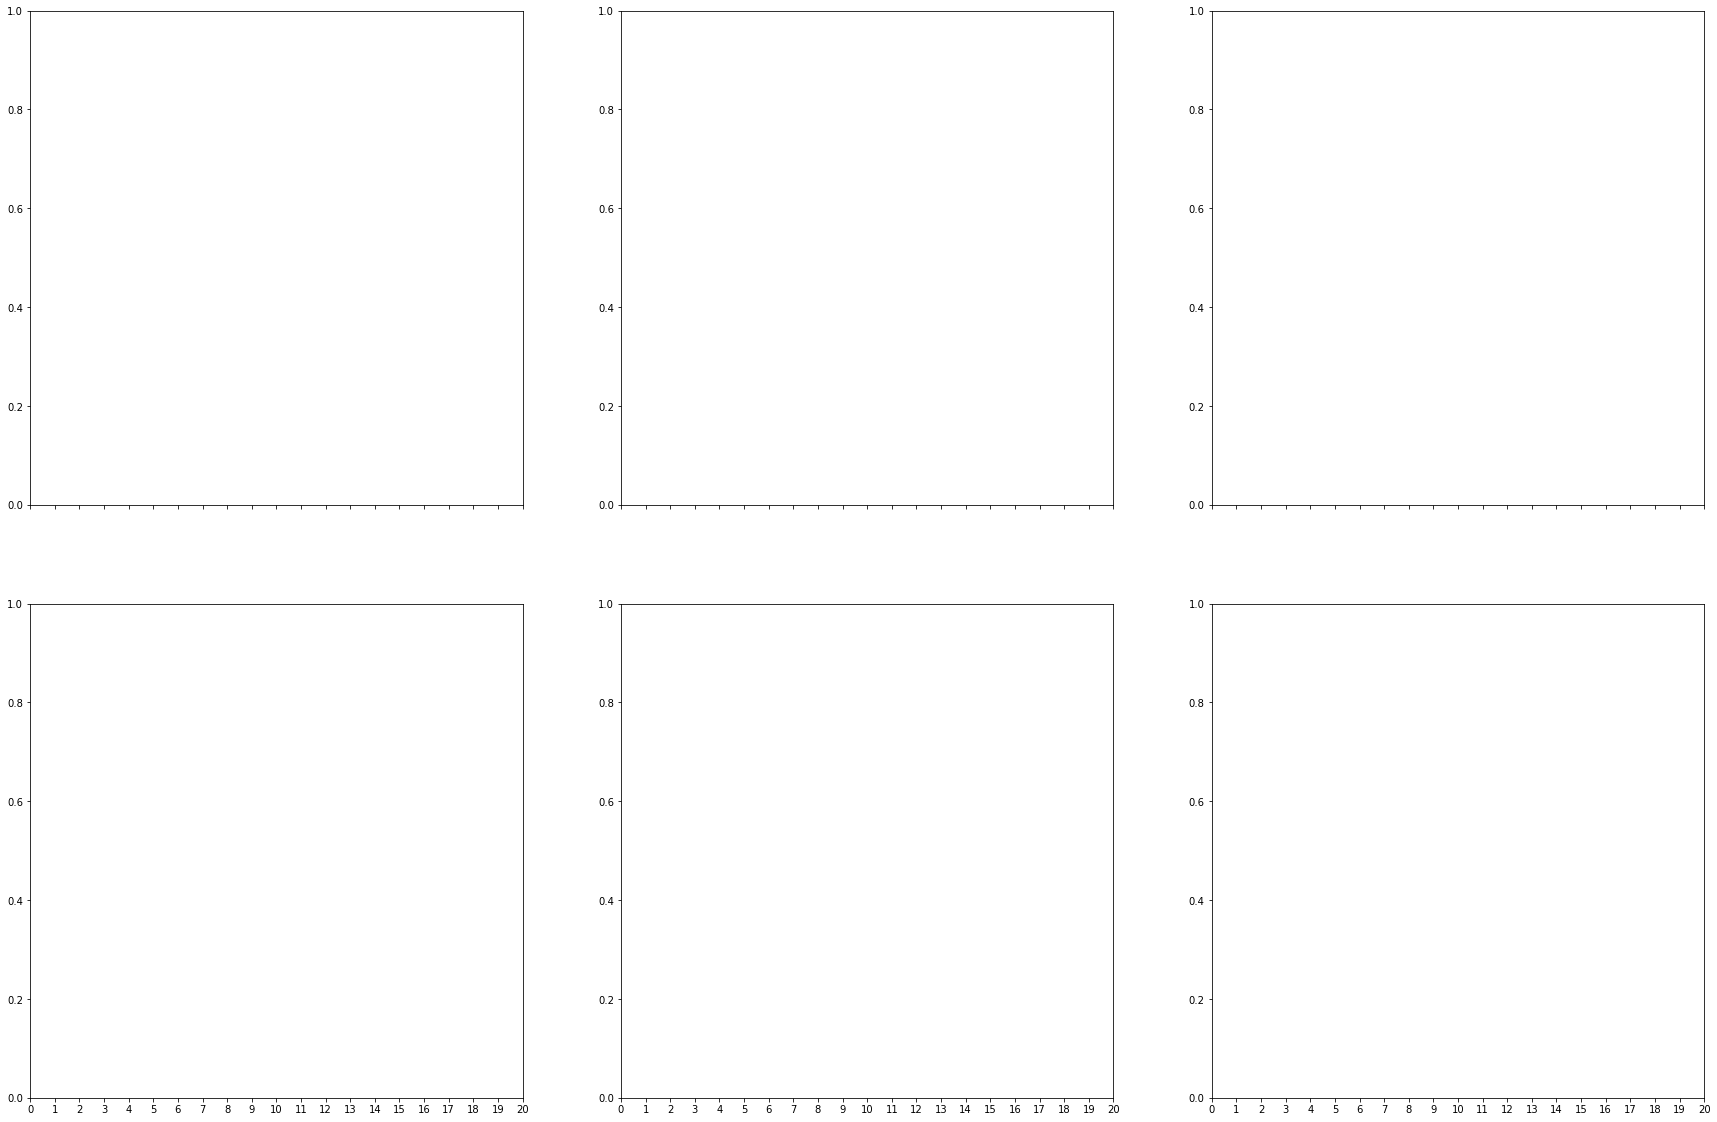

In [19]:
i=2
Xhat=np.array(M1simData[i]['Xtilde'])
A=np.array(M1simData[i]['A'])
alpha=np.array(M1simData[i]['alpha'])
beta=np.array(M1simData[i]['beta'])
plot_types(Xhat,A,alpha,beta,keys,all_types)

In [ ]:
fig,ax=plt.subplots(2,3,figsize=(30,20),sharex=True)
ax[0,0].set_xticks(np.arange(len(keys)))
#ax[0,0].set_xticklabels(keys)
ax[0,0].plot(np.array(M2simData[0]["achetypes"]).T)
ax[0,0].set_title("True")
ax[0,1].plot(np.array(M2simData[1]["achetypes"]).T,linestyle="-")
ax[0,1].set_title(f"test 0 loss={M2simData[1]['summery']['loss']}")
ax[0,2].plot(np.array(M1simData[2]["achetypes"]).T,linestyle="-")
ax[0,2].set_title(f"test 1 loss={M2simData[2]['summery']['loss']}")
ax[1,0].plot(np.array(M1simData[3]["achetypes"]).T,linestyle="-")
ax[1,0].set_title(f"test 2 loss={M2simData[3]['summery']['loss']}")
ax[1,1].plot(np.array(M1simData[4]["achetypes"]).T,linestyle="-")
ax[1,1].set_title(f"test 3 loss={M2simData[4]['summery']['loss']}")
ax[1,2].plot(np.array(M1simData[5]["achetypes"]).T,linestyle="-")
ax[1,2].set_title(f"test 4 loss={M2simData[5]['summery']['loss']}")
plt.show()

In [38]:
print("beta values of initial model")
pd.DataFrame([data["beta"] for data in M1simData])

beta values of initial model


,0,1,2,3,4,5
0,0.0,0.413866,0.532166,0.641482,0.756216,1.0
1,0.0,0.361901,0.500424,0.630984,0.767306,1.0


In [37]:
print("beta values of initial model")
pd.DataFrame([data["beta"] for data in M1simData])

beta values of initial model


,0,1,2,3,4,5
0,0.0,0.413866,0.532166,0.641482,0.756216,1.0
1,0.0,0.361901,0.500424,0.630984,0.767306,1.0


In [59]:
np.mean(np.abs(np.array(simTrue["beta"])[:,1:-1]-np.array(M1simData[0]["beta"])[1:-1]))

0.18568867455862847

In [57]:
np.array(M1simData[0]["beta"]).shape[1]

IndexError: tuple index out of range

In [95]:
ResponsBiasCompereson(simTrue["beta"],[0,0.2,0.4,0.6,0.8,1])

(array([[2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08],
        [2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08],
        [2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08],
        ...,
        [2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08],
        [2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08],
        [2.98023223e-09, 5.96046446e-09, 2.38418579e-08, 1.19209289e-08]]),
 1.1175870881507954e-08)

array([[      -inf, 0.09901735, 0.14572603, 0.6628812 , 0.74007303,
               inf],
       [      -inf, 0.13510355, 0.49416396, 0.60519791, 0.91369283,
               inf],
       [      -inf, 0.08548956, 0.38926935, 0.83085304, 0.87802511,
               inf],
       ...,
       [      -inf, 0.20246628, 0.45107603, 0.55936986, 0.88695562,
               inf],
       [      -inf, 0.13293625, 0.18643689, 0.77052051, 0.91034484,
               inf],
       [      -inf, 0.08137893, 0.27263981, 0.73430932, 0.78358889,
               inf]])

In [42]:
np.array(simTrue["beta"])[:,1:-1]

array([[0.77069694, 0.89225656, 0.92310071, 0.93717688],
       [0.09901735, 0.14572603, 0.6628812 , 0.74007303],
       [0.13510355, 0.49416396, 0.60519791, 0.91369283],
       ...,
       [0.13293625, 0.18643689, 0.77052051, 0.91034484],
       [0.08137893, 0.27263981, 0.73430932, 0.78358889],
       [0.57342988, 0.59702718, 0.6539349 , 0.99047709]])

In [48]:
np.array(M2simData[0]["beta"])[:,1:-1]

array([[0.78360212, 0.9323554 , 0.94814742, 0.9647249 ],
       [0.15881832, 0.20414564, 0.6709699 , 0.72773898],
       [0.23159184, 0.54704422, 0.57248986, 0.82426852],
       ...,
       [0.17295098, 0.22231178, 0.71996766, 0.83123279],
       [0.18756941, 0.3702243 , 0.68040752, 0.74855679],
       [0.59962732, 0.63175476, 0.66293484, 0.86714649]])

In [39]:
print("mean beta values of bias model")
pd.DataFrame([np.mean(data["beta"],axis=0) for data in M2simData])

mean beta values of bias model


,0,1,2,3,4,5
0,0.0,0.273721,0.438029,0.617931,0.789214,1.0
1,0.0,0.255590,0.431649,0.624039,0.805314,1.0


In [ ]:
np.mean(M1simData[0]["beta"],axis=0)

In [ ]:
np.mean(simTrue["alpha_new"],axis=0)

In [ ]:
i=2

In [ ]:
A1=M1simData[0]["achetypes"]
A2=M1simData[i]["A"]
archetype_correlation(A1,A2)

In [ ]:
A1=M2simData[0]["achetypes"]
A2=M2simData[i]["achetypes"]
archetype_correlation(A1,A2)

In [ ]:
S1=M2simData[0]['S_True']
S2=M2simData[i]['S']
NMI(S1,S2)

In [ ]:
S1=np.array(S1)
S2 = np.array(S2)

N, K = S1.shape

NMI=S1.T @ S2 / N

return NMI, NMI.max(0)

In [ ]:
S1=M1simData[0]['S_True']
S2=M1simData[1]['S']
NMI(S1,S2)

In [ ]:
def NMI(S1,S2):
    """
    :param S1: reconstuction matrix 1: N*K1 matrix
    :param S2: reconstuction matrix 2: N*K2 matrix
    :return: K1*K2 NMI matrix, K1 list of max NMI
    """

    #Make sure we have numpy arrays
    S1=np.array(S1)
    S2 = np.array(S2)

    N, K = S1.shape
    
    print(I(S1,S1,N,K))
    
    PKK=S1.T @ S2 / N
    print(PKK)
    
    
    #return NMI, NMI.max(0)


In [ ]:
def I(S1,S2,N,K):
    Pkk=S1.T @ S2 / N
    print(Pkk)
    for k1 in range(K):
        for k2 in ragne(K):
            
    return 

In [ ]:

X1=np.array(M1simData[0]['X_true'])
X2=np.array(M1simData[i]['reconstuction'])
beta1=find_beta(M1simData[0]["alpha"])
beta2=find_beta(M1simData[i]["alpha"])
Ordinal_reconstuction(X1,X2,beta1,beta2)

In [ ]:

X1=np.array(M1simData[0]['X_observed'])
X2=np.array(M1simData[i]['reconstuction'])
beta2=find_beta(M1simData[i]["alpha"])
Ordinal_reconstuction(X1,X2,beta2=beta2)

In [ ]:
X1=np.array(M1simData[0]['X_observed'])
X2=np.array(M1simData[0]['X_true'])
beta2=find_beta(M1simData[0]["alpha"])
Ordinal_reconstuction(X1,X2,beta2=beta2)

In [ ]:
#Not implemented
Ordinal_reconstuction()

# Real data

In [66]:
#Load data
data_all=pd.read_csv(r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\Schmidt_et_al_2021_Latent_profile_analysis_of_human_values_SUPPL\VB_LPA\Data\ESS8_data.csv")
keys=np.array(["SD1","PO1","UN1","AC1","SC1","ST1","CO1","UN2","TR1","HD1","SD2","BE1","AC2","SC2","ST2","CO2","PO2","BE2","UN3","TR2","HD2"])
data=data_all[keys]

#savedir=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\4types"
savedir=r"C:\Users\Andre\OneDrive - Danmarks Tekniske Universitet\Bachelor project\realData"
K=4
times=3

In [150]:
K

6

In [67]:
#load OAA
M1files=[f"K{K}_sample{i}OAA_Result" for i in range(times)]
M1sumfiles=[f"K{K}_sample{i}OAA_summery" for i in range(times)]
M1Data=[]
M1Sum=[]
for file in M1files:
    with open(os.path.join(savedir,file), "r") as file:
        M1Data.append(json.load(file))
        
for file in M1sumfiles:
    with open(os.path.join(savedir,file), "r") as file:
        M1Sum.append(json.load(file))
pd.DataFrame([data for data in M1Sum])

,loss,Sigma,best_epokes,RunTime
0,1.098651e+06,0.141887,999,839.389171
1,1.110924e+06,0.170770,999,830.314831
2,1.097225e+06,0.136165,999,824.186697


In [68]:
#load RB OAA

M2files=[f"K{K}_sample{i}RB_Result" for i in range(times)]
M2sumfiles=[f"K{K}_sample{i}RB_summery" for i in range(times)]
M2Data=[]
M2Sum=[]
for file in M2files:
    with open(os.path.join(savedir,file), "r") as file:
        M2Data.append(json.load(file))
        
for file in M2sumfiles:
    with open(os.path.join(savedir,file), "r") as file:
        M2Sum.append(json.load(file))
pd.DataFrame([data for data in M2Sum])

,loss,Sigma,best_epokes,RunTime
0,797836.927135,0.065622,999,1321.159967
1,800118.842295,0.062093,998,1305.791502
2,797638.729111,0.066308,959,1292.695879


In [53]:
[(permutation, archetype_correlation(M1Data[permutation[0]]["A"],M1Data[permutation[1]]["A"])[2])
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.659510051521864),
 ((0, 2), 0.6703035030499965),
 ((1, 0), 0.6879455603480086),
 ((1, 2), 0.6196006275993784),
 ((2, 0), 0.700261239945632),
 ((2, 1), 0.6476829121152587)]

In [54]:
[(permutation, NMI(M1Data[permutation[0]]["S"],M1Data[permutation[1]]["S"]))
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.7374795329185394),
 ((0, 2), 0.7370088330225739),
 ((1, 0), 0.7374795329185397),
 ((1, 2), 0.72856118352585),
 ((2, 0), 0.7370088330225747),
 ((2, 1), 0.72856118352585)]

In [57]:
[(permutation,ResponsBiasCompereson(M1Data[permutation[0]]["beta"],M1Data[permutation[1]]["beta"])[1]) for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.05757806897163391),
 ((0, 2), 0.05880094766616821),
 ((1, 0), 0.05757806897163391),
 ((1, 2), 0.11637901663780212),
 ((2, 0), 0.05880094766616821),
 ((2, 1), 0.11637901663780212)]

In [58]:
[(permutation, archetype_correlation(M2Data[permutation[0]]["A"],M2Data[permutation[1]]["A"])[2])
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.5867141213939548),
 ((0, 2), 0.6341808516783819),
 ((1, 0), 0.5987904386940741),
 ((1, 2), 0.576587659178721),
 ((2, 0), 0.6384514511147104),
 ((2, 1), 0.613448905866922)]

In [59]:
[(permutation, NMI(M2Data[permutation[0]]["S"],M2Data[permutation[1]]["S"]))
 for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.4101925559833986),
 ((0, 2), 0.3972713923693444),
 ((1, 0), 0.41019255598339854),
 ((1, 2), 0.42641279260662174),
 ((2, 0), 0.3972713923693448),
 ((2, 1), 0.42641279260662207)]

In [60]:
[(permutation,ResponsBiasCompereson(M2Data[permutation[0]]["beta"],M2Data[permutation[1]]["beta"])[1]) for permutation in itertools.permutations(range(times),2)]

[((0, 1), 0.05641220299212375),
 ((0, 2), 0.08312693932594069),
 ((1, 0), 0.05641220299212375),
 ((1, 2), 0.0893243380208888),
 ((2, 0), 0.08312693932594069),
 ((2, 1), 0.0893243380208888)]

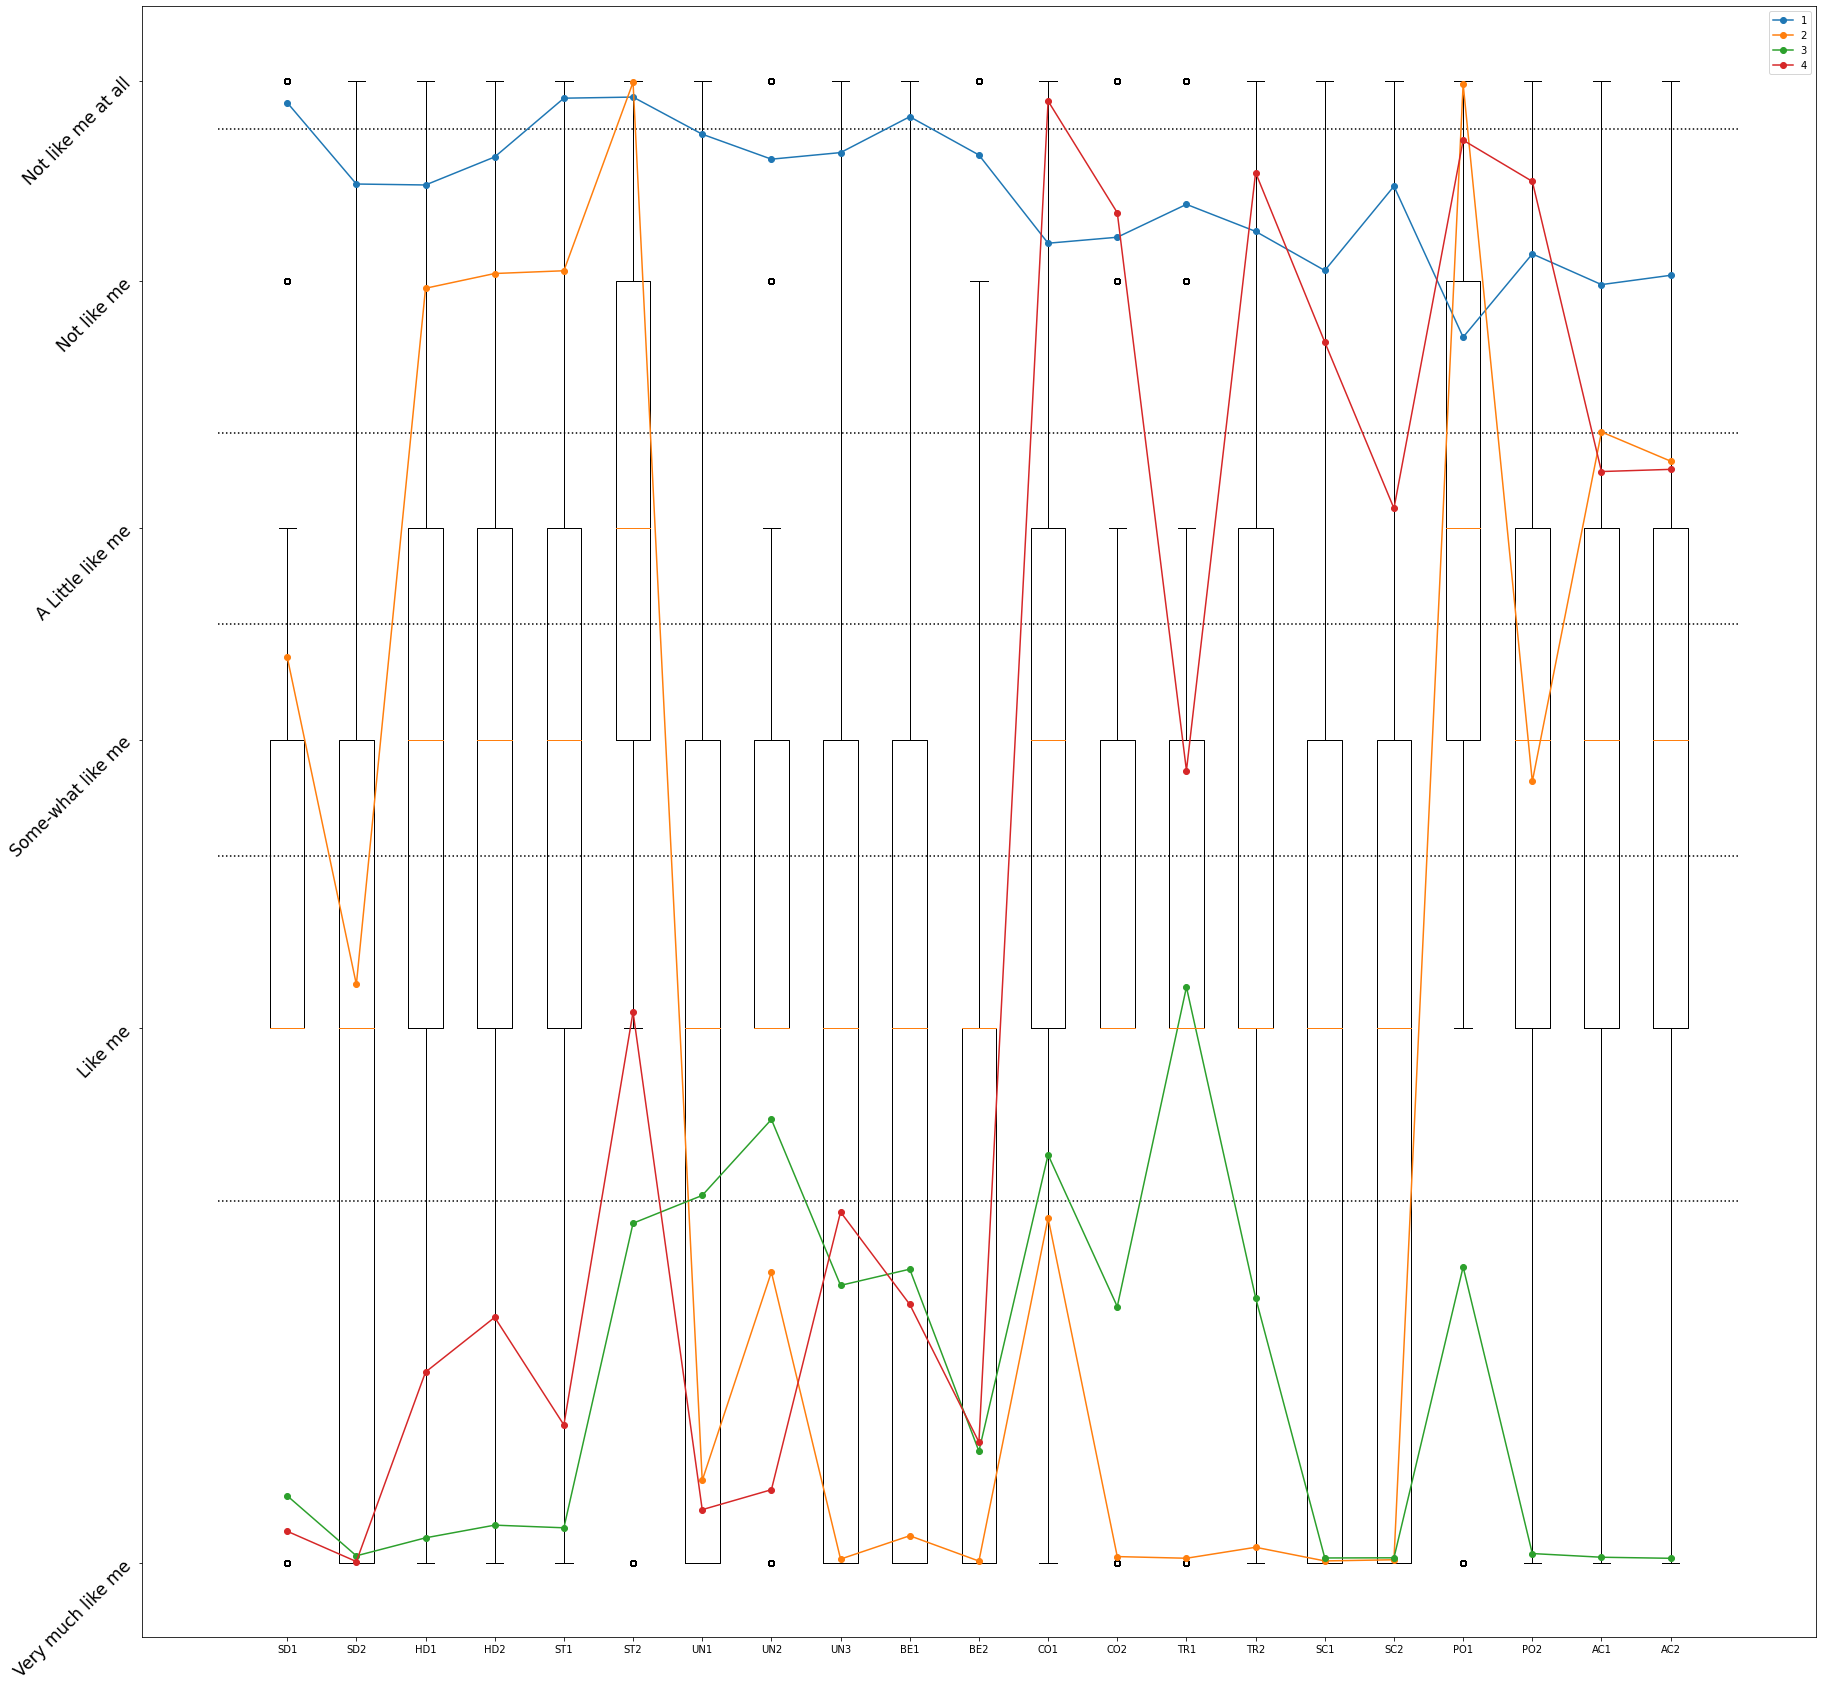

In [69]:
#Model 1 plot types
i=2
Xhat=np.array(M1Data[i]['Xtilde'])
A=np.array(M1Data[i]['A'])
alpha=np.array(M1Data[i]['alpha'])
beta=np.array(M1Data[i]['beta'])
plot_types(Xhat,A,alpha,beta,keys,all_types)

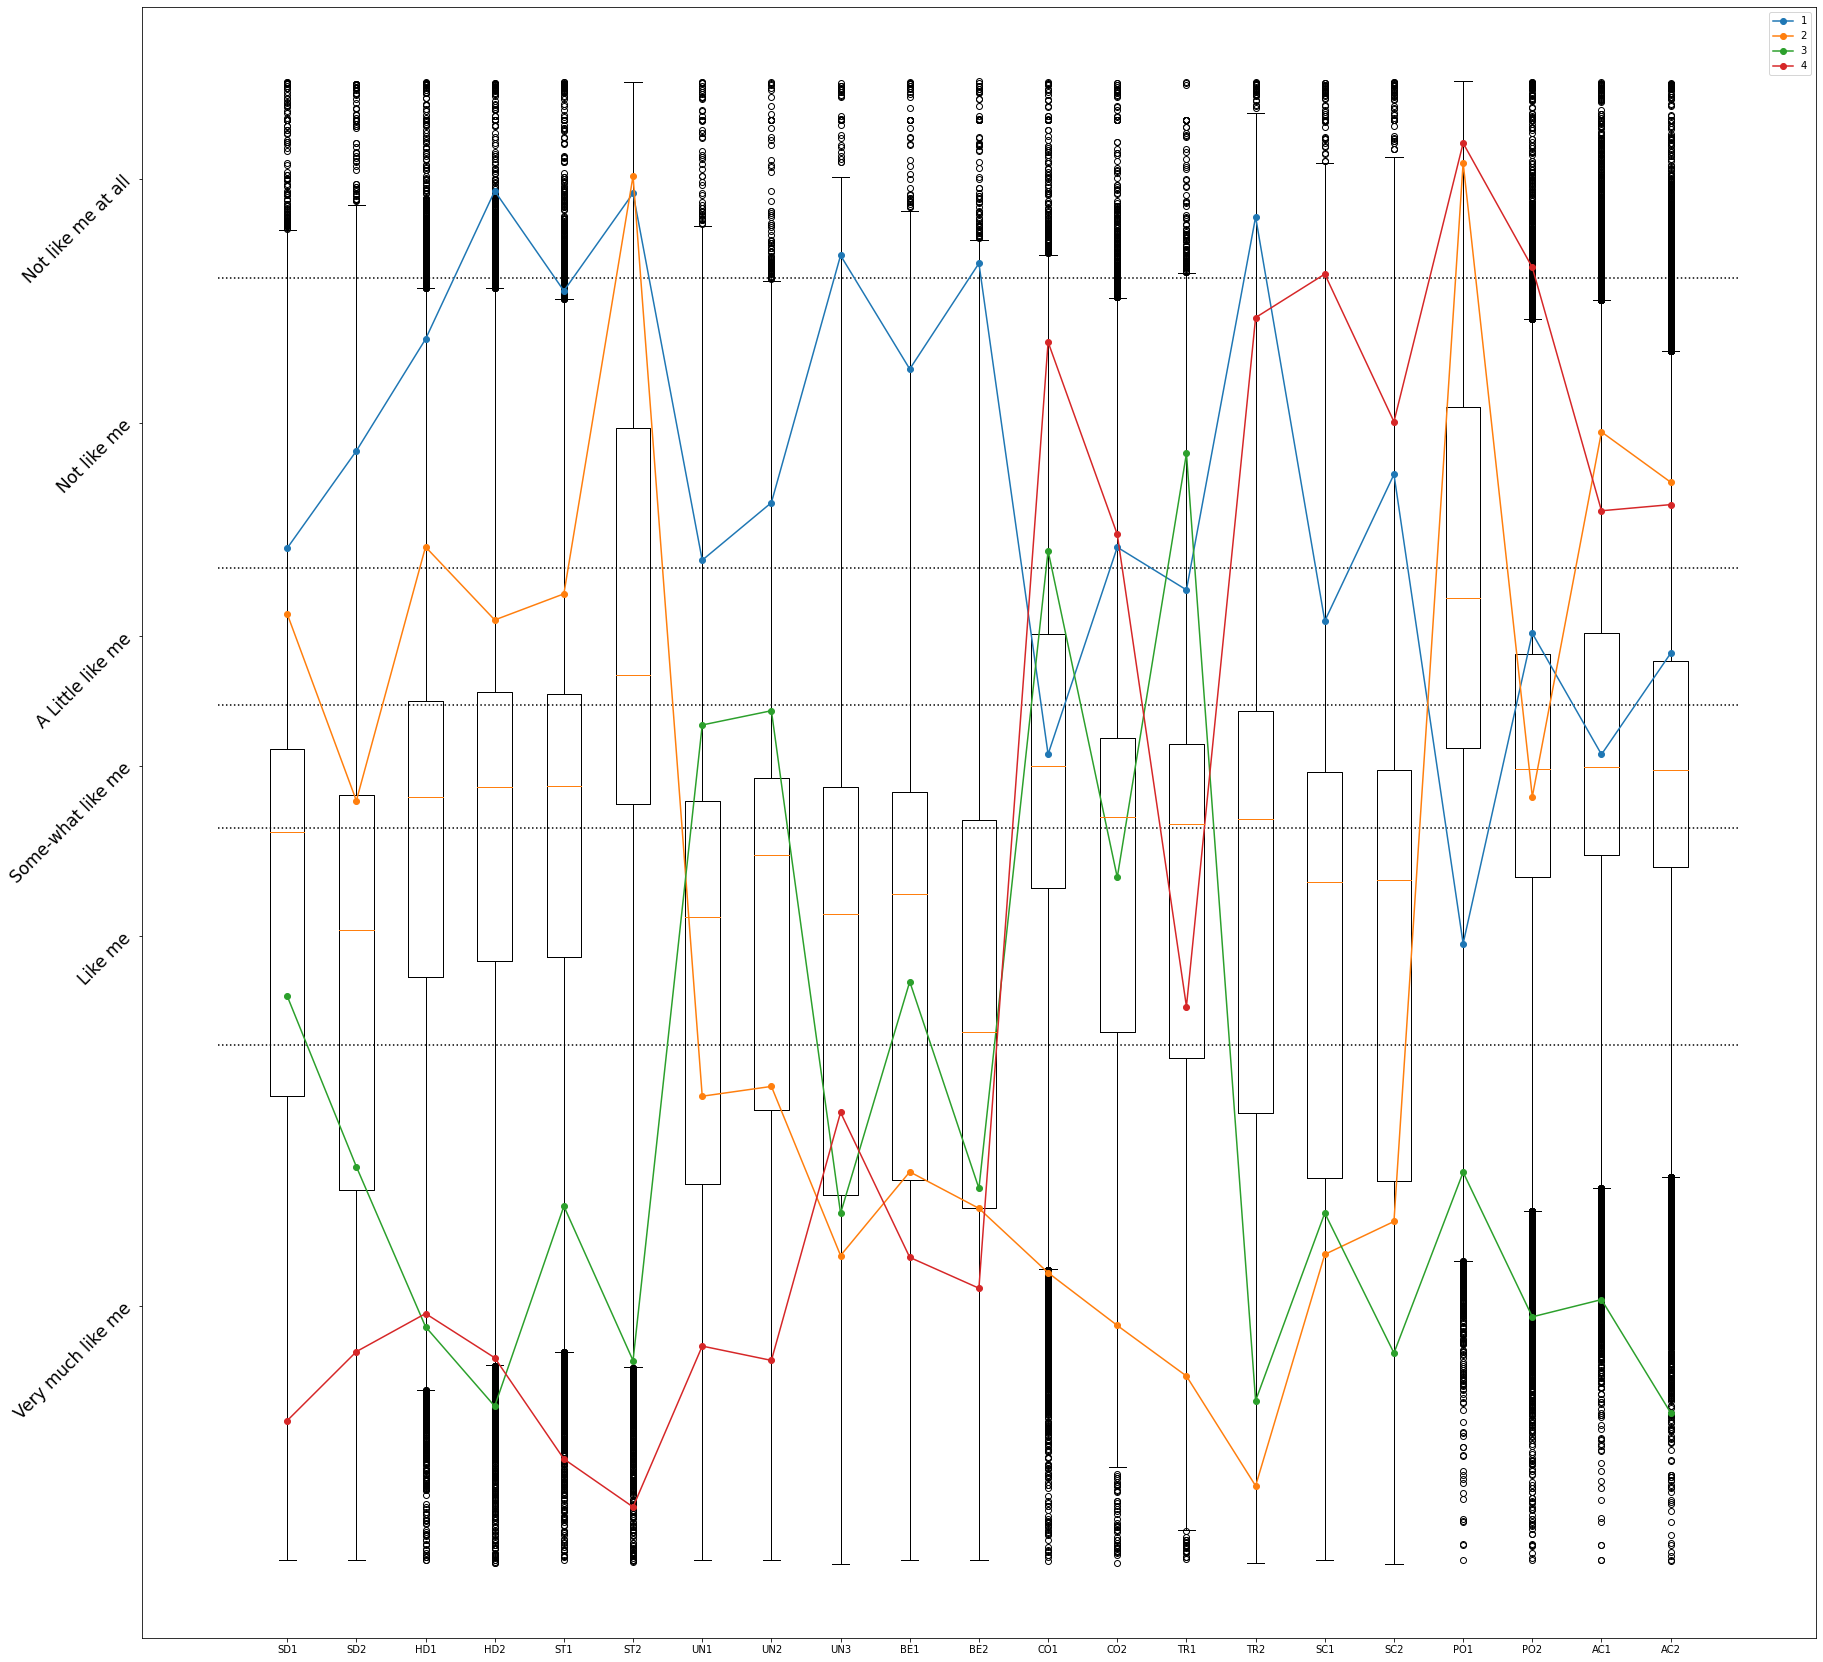

In [70]:
#Model 1 plot types
i=2
Xhat=np.array(M2Data[i]['Xtilde'])
A=np.array(M2Data[i]['A'])
alpha=np.mean(M2Data[i]['alpha'],axis=0)
beta=np.mean(M2Data[i]['beta'],axis=0)
plot_types(Xhat,A,alpha,beta,keys,all_types)

In [83]:
ResponsBiasCompereson(M1Data[0]["beta"],M1Data[2]["beta"])

(array([0.04473892, 0.04593253, 0.04821128, 0.04950678, 0.0503127 ]),
 0.047740441560745236)

In [13]:
print("beta values of initial model")
pd.DataFrame([data["beta"] for data in M1Data])

beta values of initial model


,0,1,2,3,4,5,6
0,0.0,0.315226,0.501069,0.624579,0.727084,0.890690,1.0
1,0.0,0.168366,0.391347,0.539836,0.664179,0.860541,1.0
2,0.0,0.359965,0.547001,0.672790,0.776591,0.941003,1.0


In [14]:
print("mean beta values of bias model")
pd.DataFrame([np.mean(data["beta"],axis=0) for data in M2Data])

mean beta values of bias model


,0,1,2,3,4,5,6
0,0.0,0.304833,0.448568,0.533618,0.631334,0.834474,1.0
1,0.0,0.281700,0.433818,0.520150,0.619279,0.828579,1.0
2,0.0,0.327120,0.469727,0.552322,0.647432,0.852737,1.0


In [15]:
#Model 1 plot types
i=0
Xhat=np.array(M2Data[i]['transformation'])
A=np.array(M2Data[i]['achetypes'])
plot_types(Xhat,A,keys,all_types)

KeyError: 'transformation'

In [ ]:
pd.DataFrame(np.round(M1Data[0]["beta"],4)).iloc[[22995,5912],:]

In [ ]:
np.mean(M1Data[0]["beta"],axis=0)

In [ ]:
np.argmin(np.array(M1Data[0]["Xtilde"]),axis=0)

In [ ]:
pd.set_option('display.max_columns', 21)
data.iloc[[22995,5912],:]

In [ ]:
np.argmax(np.array(M1Data[0]["C"]),axis=1)

In [ ]:
np.array(M1Data[0]["X"])[25060,:]

In [ ]:
pd.DataFrame(np.round(M1Data[0]["beta"],4))

In [ ]:
[np.round(np.array(data["alpha"]),4) for data in M1Data]

In [ ]:
[data["alpha"] for data in M1Data]

In [ ]:
pd.DataFrame(np.round(M2Data[0]["alpha"],2))

In [ ]:
S1=M2Data[0]['S']
S2=M2Data[1]['S']
NMI(S1,S2)

In [17]:
A1=M2Data[0]["A"]
A2=M2Data[1]["A"]
archetype_correlation(A1,A2)

(array([[ 0.31049357,  0.54234826, -0.92578157,  0.01119895],
        [-0.25631501, -0.34579881,  0.94716362, -0.34365018],
        [-0.6981193 , -0.04721392, -0.00741997,  0.9813679 ],
        [ 0.28453251, -0.29084639,  0.53957886, -0.37742842]]),
 array([0.31049357, 0.54234826, 0.94716362, 0.9813679 ]),
 0.6953433374072407)

In [ ]:
A1=M1Data[0]["achetypes"]
A2=M1Data[1]["achetypes"]
archetype_correlation(A1,A2)

In [ ]:
M1Data[0].keys()

In [ ]:
M2Data[0]['S']

In [ ]:
M2Data[i]['delta']

In [ ]:
np.array(M1Data[i]['achetypes']).shape